<a href="https://colab.research.google.com/github/ZdungTran/client-js/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensor("Mul_1:0", shape=(4,), dtype=int32)


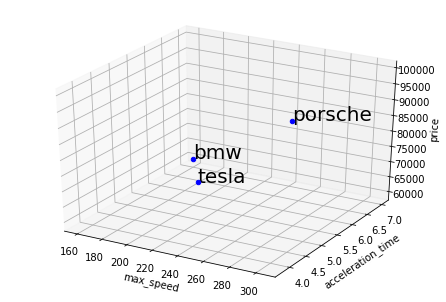

[[ 1.          0.42538808 -0.9284599 ]
 [ 0.42538808  1.         -0.73110643]
 [-0.9284599  -0.73110643  1.        ]]


In [0]:
import tensorflow as tf
import numpy as np
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Print the result
print(result)



from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure

# features
X = np.array([
    [304, 4.4, 99200],
    [250, 3.8, 79990],
    [160, 7, 60000]
])
# labels
y = ['porsche', 'tesla', 'bmw']
# setup our chart
fig = figure()
ax = Axes3D(fig)
# iterate on the examples and plot them
for i in range(len(X)): 
    ax.scatter(
        X[i,0],
        X[i,1],
        X[i,2],
        color='b') 
        
    ax.text(
        X[i,0],
        X[i,1],
        X[i,2],
        '%s' % (str(y[i])), 
        size=20, 
        zorder=1,
        color='k')
    

    # label our chart
ax.set_xlabel('max_speed')
ax.set_ylabel('acceleration_time')
ax.set_zlabel('price')
pyplot.show()


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
# scale unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled
# calculate cosine_similarity
similarities = cosine_similarity(X_scaled,X_scaled)
print(similarities)




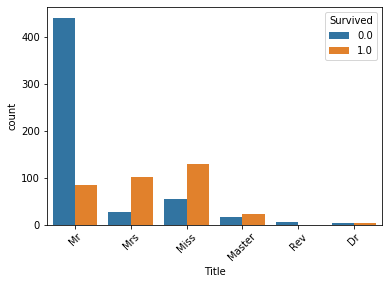

In [10]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# reading in files

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = pd.concat([train, test], axis=0, sort=True)


df['Survived'].value_counts()

df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# replacing some titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace=True)

df['Title'].value_counts()


# impute missing Age values using median of Title groups
title_ages = dict(df.groupby('Title')['Age'].median())

# create a column of the average ages
df['age_med'] = df['Title'].apply(lambda x: title_ages[x])

# replace all missing ages with the value in this column
df['Age'].fillna(df['age_med'], inplace=True, )
del df['age_med']

# viz of survival rates of titles

sns.countplot(x='Title', data=df, hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [15]:
# impute missing Fare values using median of Pclass groups
class_fares = dict(df.groupby('Pclass')['Fare'].median())

# create a column of the average fares
df['fare_med'] = df['Pclass'].apply(lambda x: class_fares[x])

# replace all missing fares with the value in this column
df['Fare'].fillna(df['fare_med'], inplace=True, )
del df['fare_med']

df['Embarked'].fillna(method='backfill', inplace=True)

df['Family_Size'] = df['Parch'] + df['SibSp']

train = df[pd.notnull(df['Survived'])]
test = df[pd.isnull(df['Survived'])]

# importing for tensorflow

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed

df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))
   
df.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title,Family_Size
0,-0.574635,S,-0.503176,-0.445,0.841916,male,0.481288,0.0,Mr,0.073352
1,0.641140,C,0.734809,-0.445,-1.546098,female,0.481288,1.0,Mrs,0.073352
2,-0.270692,S,-0.490126,-0.445,0.841916,female,-0.479087,1.0,Miss,-0.558346
3,0.413182,S,0.383263,-0.445,-1.546098,female,0.481288,1.0,Mrs,0.073352
4,0.413182,S,-0.487709,-0.445,0.841916,male,-0.479087,0.0,Mr,-0.558346


In [18]:
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)


import tensorflow as tf

Sex = tf.feature_column.categorical_column_with_vocabulary_list("Sex", ["female", "male"])
Embarked = tf.feature_column.categorical_column_with_vocabulary_list("Embarked", ["S", "C", "Q"])
Title = tf.feature_column.categorical_column_with_vocabulary_list("Title", ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'])
Age = tf.feature_column.numeric_column("Age")
Fare = tf.feature_column.numeric_column("Fare")
Parch = tf.feature_column.numeric_column("Parch")
Pclass = tf.feature_column.numeric_column("Pclass")
SibSp = tf.feature_column.numeric_column("SibSp")
Family_Size = tf.feature_column.numeric_column("Family_Size")

feat_cols = [Sex, Embarked, Title, Age, Fare, Parch, Pclass, SibSp, Family_Size]

import tensorflow as tf

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,
                                               y=y_train,
                                               batch_size=100,
                                               num_epochs=None,
                                               shuffle=True)


model = tf.estimator.LinearClassifier(feature_columns = feat_cols)

model.train(input_fn=input_func, max_steps=10000)

pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_val,batch_size=len(X_val),shuffle=False)

predictions = list(model.predict(input_fn=pred_fn))
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])
    
from sklearn.metrics import classification_report
print(classification_report(y_val,final_preds))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpuzif9dom', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff52de9cc18>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Vari